In [37]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
# read from csv and save corresponding column data to variables
df = pd.read_csv('process_error.csv')
# transfer unit to meter
y = df.y
x = df.x
act_dist = df.act_dist
forward_error = df.forward
lateral_error = df.lateral
l = len(y)

In [38]:
forward_error

0     0.031
1     0.019
2     0.010
3    -0.024
4    -0.026
      ...  
95   -0.015
96    0.023
97    0.021
98   -0.033
99   -0.038
Name: forward, Length: 100, dtype: float64

In [39]:
type(act_dist)

pandas.core.series.Series

In [40]:
process_error = act_dist.subtract(2)

In [41]:
process_error

0     0.028824
1     0.015438
2     0.006195
3    -0.027740
4    -0.029614
        ...   
95   -0.018757
96    0.019143
97    0.017321
98   -0.036877
99   -0.041908
Name: act_dist, Length: 100, dtype: float64

In [42]:
def variance(data, ddof=0):
    n = len(data)
    mean = sum(data) / n
    return sum((x - mean) ** 2 for x in data) / (n - ddof)
def stdev(data):
    var = variance(data)
    std_dev = math.sqrt(var)
    return std_dev

In [43]:
stdev(process_error)

0.02241880295075522

In [44]:
x.head(10)

0    4.076
1    4.064
2    4.055
3    4.021
4    4.019
5    4.035
6    4.053
7    4.018
8    4.046
9    4.062
Name: x, dtype: float64

In [45]:
# ground truth y
expected_y = pd.Series([2.435] * l)
expected_x = pd.Series([4.045] * l)

In [46]:
rmse_y1 = mean_squared_error(y, expected_y)
rmse_x1 = mean_squared_error(x, expected_x)
rmse_net = math.sqrt(rmse_x1 ** 2 + rmse_y1 ** 2)

In [47]:
rmse_y1

0.0009678000000000042

In [48]:
rmse_x1

0.0005020700000000012

In [49]:
rmse_net

0.001090280296483436

In [50]:
x.value_counts()

4.055    5
4.045    4
4.053    4
4.065    3
4.035    3
4.068    3
4.062    3
4.058    3
4.044    3
4.007    3
4.069    2
4.060    2
4.018    2
4.056    2
4.051    2
4.061    2
4.063    2
4.024    2
4.059    2
4.073    2
4.064    2
4.038    2
4.049    2
4.050    2
4.052    2
4.030    2
4.057    2
4.042    2
4.067    1
3.990    1
4.047    1
4.039    1
4.040    1
3.985    1
4.046    1
4.019    1
4.081    1
4.086    1
4.082    1
4.070    1
3.992    1
3.998    1
4.013    1
4.076    1
4.072    1
4.012    1
4.028    1
4.025    1
4.066    1
4.011    1
4.027    1
4.071    1
4.029    1
4.023    1
4.043    1
4.021    1
3.988    1
4.000    1
Name: x, dtype: int64

In [51]:
x.describe()

count    100.000000
mean       4.045630
std        0.022511
min        3.985000
25%        4.033750
50%        4.051500
75%        4.062000
max        4.086000
Name: x, dtype: float64

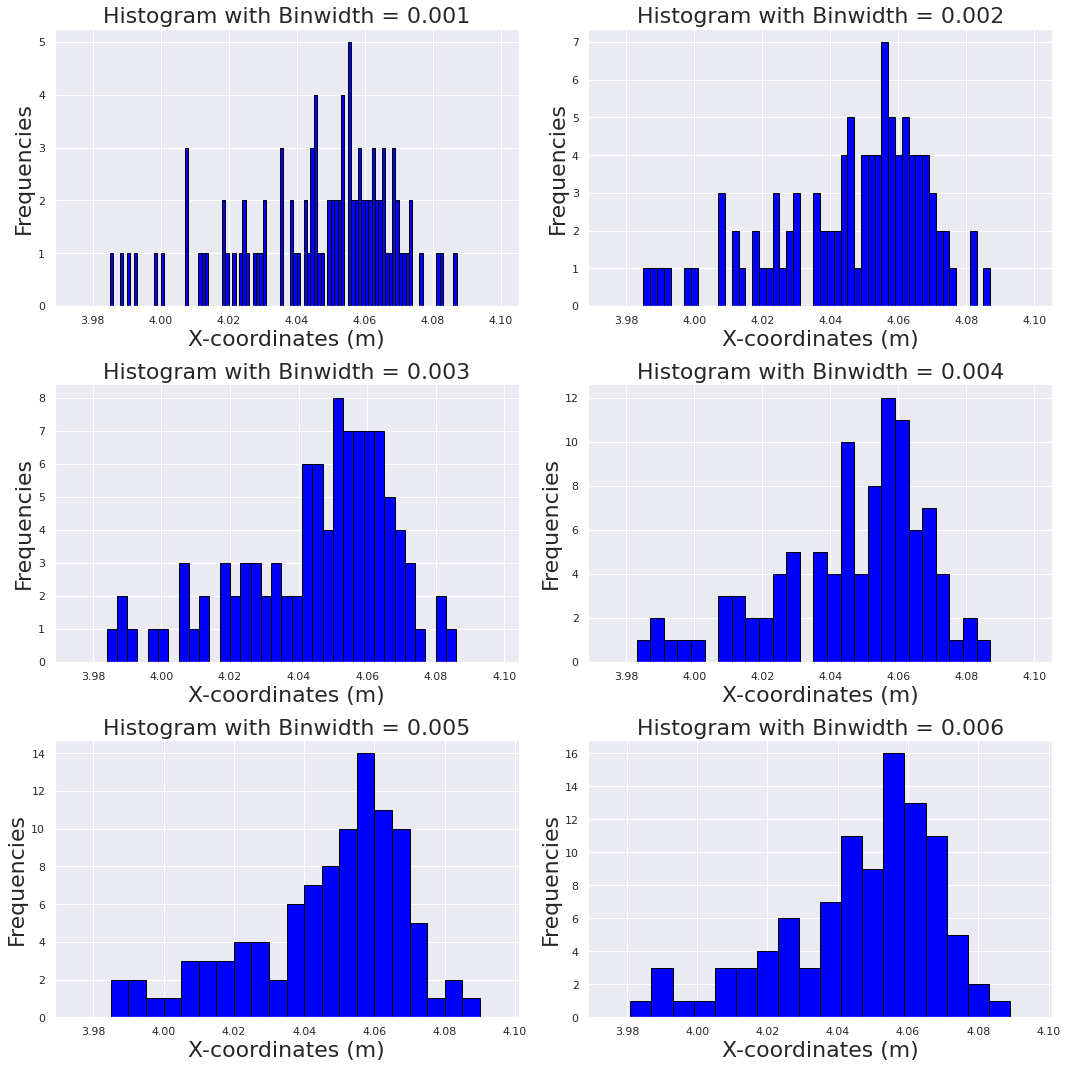

In [52]:
plt.figure(figsize=(15, 15))
for i, binwidth in enumerate([0.001,0.002,0.003,0.004,0.005,0.006]):    
    bin_values = np.arange(start=3.975, stop=4.1, step=binwidth)
    # Set up the plot
    ax = plt.subplot(3, 2, i + 1)
    
    # Draw the plot
    ax.hist(x, bins = bin_values,
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %.3f' % binwidth, size = 22)
    ax.set_xlabel('X-coordinates (m)', size = 22)
    ax.set_ylabel('Frequencies', size= 22)

plt.tight_layout()
plt.show()
# plt.savefig('Histograms.jpg', bbox_inches='tight', dpi=100)

In [53]:
min(act_dist)

1.9363346818151

In [54]:
max(act_dist)

2.03700883650513

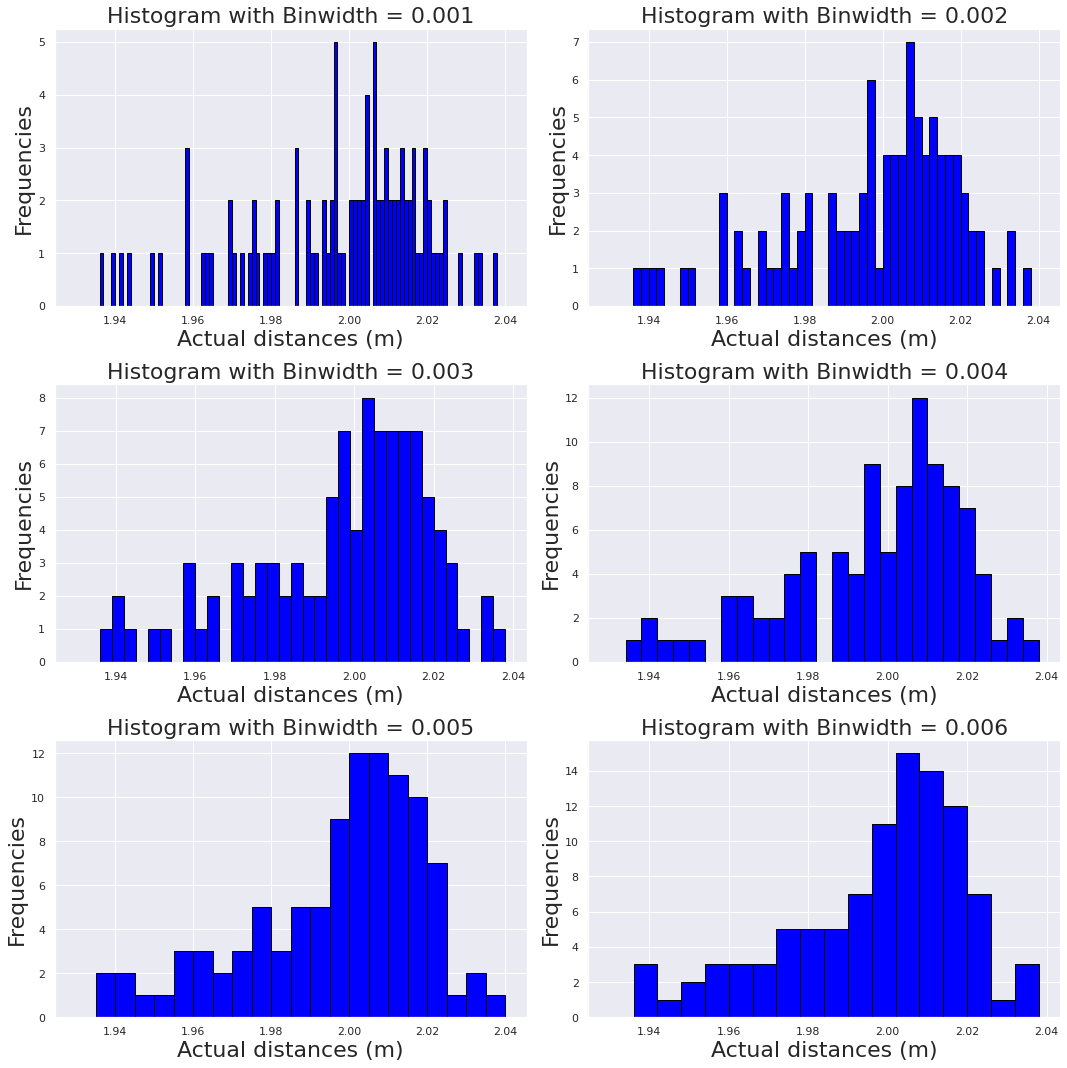

In [55]:
plt.figure(figsize=(15, 15))
for i, binwidth in enumerate([0.001,0.002,0.003,0.004,0.005,0.006]):    
    bin_values = np.arange(start=1.93, stop=2.04, step=binwidth)
    # Set up the plot
    ax = plt.subplot(3, 2, i + 1)
    
    # Draw the plot
    ax.hist(act_dist, bins = bin_values,
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %.3f' % binwidth, size = 22)
    ax.set_xlabel('Actual distances (m)', size = 22)
    ax.set_ylabel('Frequencies', size= 22)

plt.tight_layout()
plt.show()
# plt.savefig('act_dist.pdf', bbox_inches='tight', dpi=100)

From above histagrams we can see, smaller binwidths can make the histagram cluttered and bigger binwidths may make you ignore the nuances in the data, which we should always balance.

In [56]:
bin_values = np.arange(start=-0.1, stop=0.075, step=0.001)

/home/mingze/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


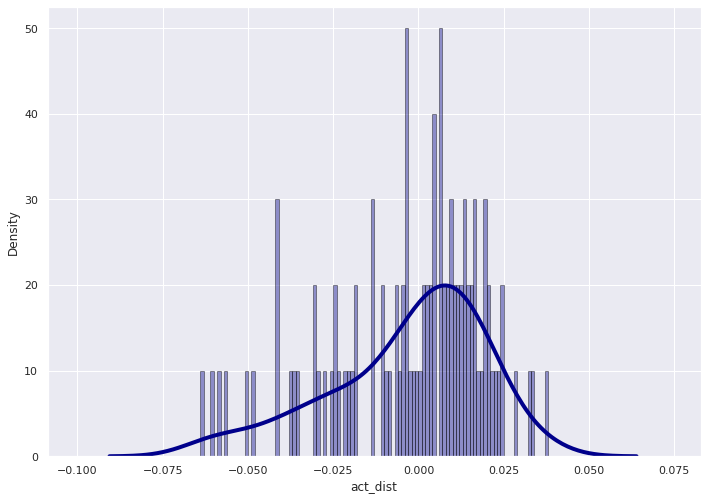

In [57]:
# a4_dims = (11.7, 8.27)
# fig, ax = plt.subplots(figsize=a4_dims)
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Density Plot and Histogram of x
# sns.distplot(subset['arr_delay'], hist = False, kde = True,
#                  kde_kws = {'shade': True, 'linewidth': 3}, 
#                   label = airline)
# 'shade': True can be used to compare multiple density plot
# rug=True , for showing all detailed data
sns_plot = sns.distplot(process_error, hist=True, kde=True, 
             bins=bin_values, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


/home/mingze/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


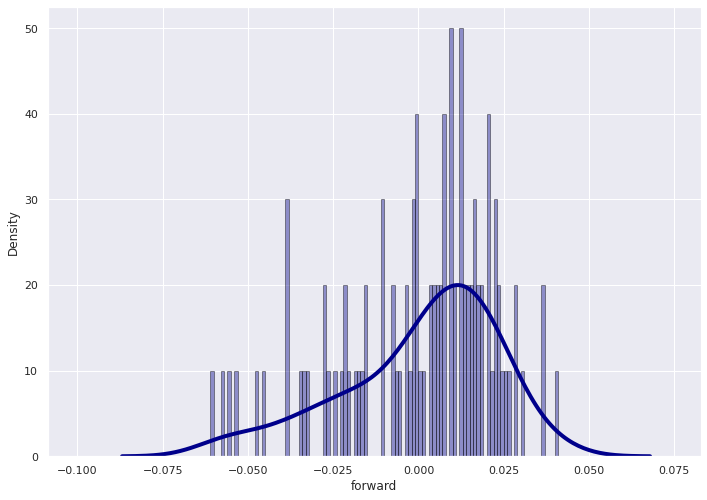

In [58]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Density Plot and Histogram of x
# sns.distplot(subset['arr_delay'], hist = False, kde = True,
#                  kde_kws = {'shade': True, 'linewidth': 3}, 
#                   label = airline)
# 'shade': True can be used to compare multiple density plot
# rug=True , for showing all detailed data
sns_plot = sns.distplot(forward_error, hist=True, kde=True, 
             bins=bin_values, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

/home/mingze/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


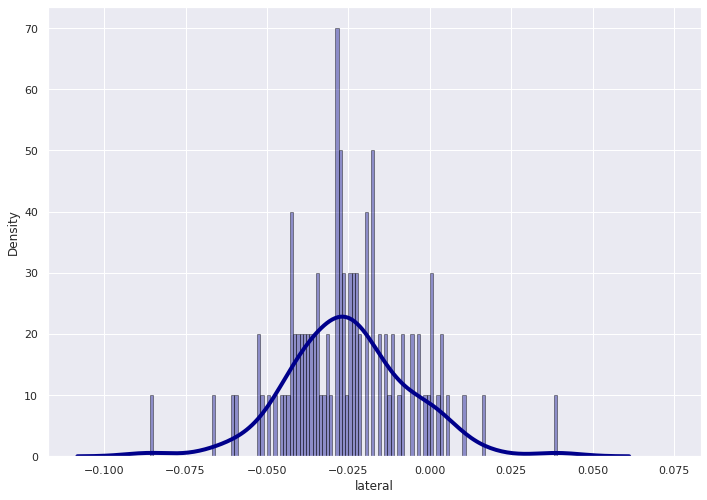

In [59]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Density Plot and Histogram of x
# sns.distplot(subset['arr_delay'], hist = False, kde = True,
#                  kde_kws = {'shade': True, 'linewidth': 3}, 
#                   label = airline)
# 'shade': True can be used to compare multiple density plot
# rug=True , for showing all detailed data
sns_plot = sns.distplot(lateral_error, hist=True, kde=True, 
             bins=bin_values, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

/home/mingze/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'process error under velocity of 0.5 m/s (m)')

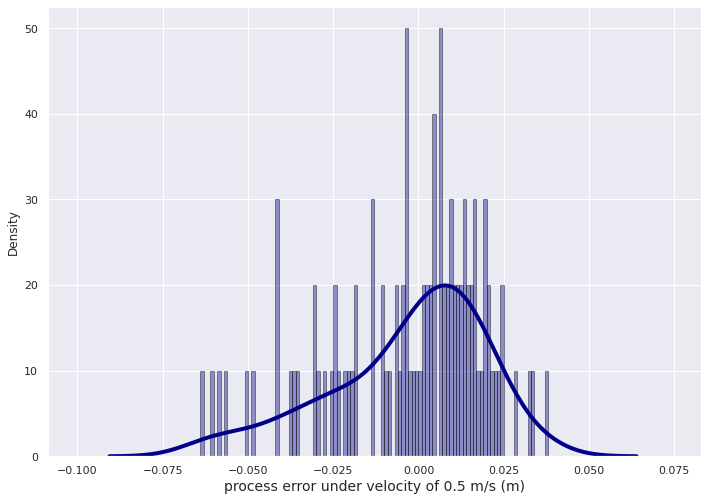

In [60]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Density Plot and Histogram of act_dist
# sns.distplot(subset['arr_delay'], hist = False, kde = True,
#                  kde_kws = {'shade': True, 'linewidth': 3}, 
#                   label = airline)
# 'shade': True can be used to compare multiple density plot
# rug=True , for showing all detailed data
sns_plot = sns.distplot(process_error, hist=True, kde=True, 
             bins=bin_values, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
# sns_plot.set(xlabel='process error (m)')
sns_plot.set_xlabel("process error under velocity of 0.5 m/s (m)",fontsize=14)
# plt.savefig("process_error_0.5.pdf")

In [61]:
df1 = pd.read_csv('process_error3.csv')
act_dist1 = df1.act_dist
forward_error1 = df1.forward
lateral_error1 = df1.lateral

In [62]:
act_dist1

0     1.975385
1     1.988465
2     1.991464
3     2.001361
4     2.034130
5     1.978259
6     2.004087
7     2.018524
8     2.029568
9     1.999196
10    1.996211
11    2.000036
12    2.012090
13    1.986444
14    1.989006
15    1.983275
16    2.010016
17    1.996110
18    1.984364
19    1.973491
20    1.939959
21    1.989532
22    2.046130
23    1.941670
24    1.988308
Name: act_dist, dtype: float64

In [63]:
process_error1 = act_dist1.subtract(2)

In [64]:
min(process_error1)

-0.06004072207687994

In [65]:
max(process_error1)

0.046130250008539875

/home/mingze/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'process error under velocity of 0.7 m/s (m)')

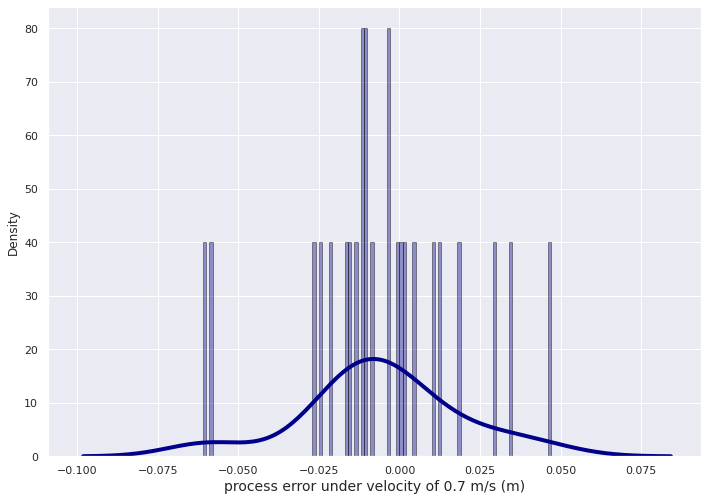

In [66]:
sns_plot = sns.distplot(process_error1, hist=True, kde=True, 
             bins=bin_values, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
# sns_plot.set(xlabel='process error (m)')
sns_plot.set_xlabel("process error under velocity of 0.7 m/s (m)",fontsize=14)
# plt.savefig("process_error_0.7.pdf")

In [67]:
df2 = pd.read_csv('process_error4.csv')
act_dist2 = df2.act_dist
forward_error2 = df2.forward
lateral_error2 = df2.lateral

In [68]:
process_error2 = act_dist2.subtract(2)

/home/mingze/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'process error under velocity of 0.9 m/s (m)')

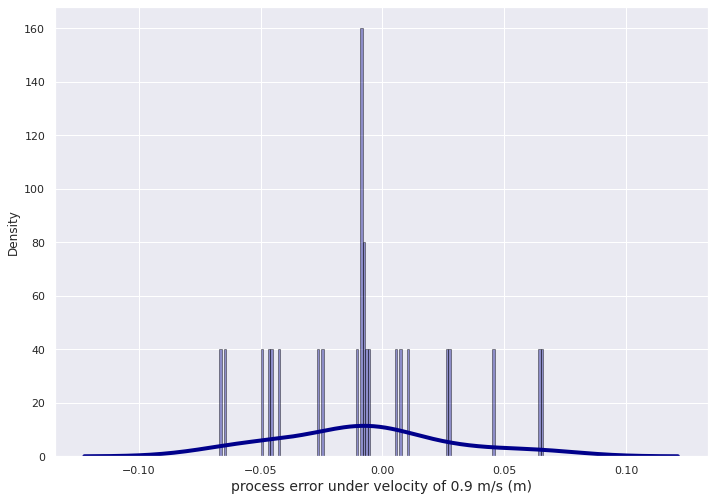

In [69]:
sns_plot = sns.distplot(process_error2, hist=True, kde=True, 
             bins=bin_values, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
# sns_plot.set(xlabel='process error (m)')
sns_plot.set_xlabel("process error under velocity of 0.9 m/s (m)",fontsize=14)
# plt.savefig("process_error_0.9.pdf")

In [70]:
df3 = pd.read_csv('process_error5.csv')
act_dist3 = df3.act_dist
forward_error3 = df3.forward
lateral_error3 = df3.lateral

In [71]:
process_error3 = act_dist3.subtract(2)

/home/mingze/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'process error under velocity of 1.1 m/s (m)')

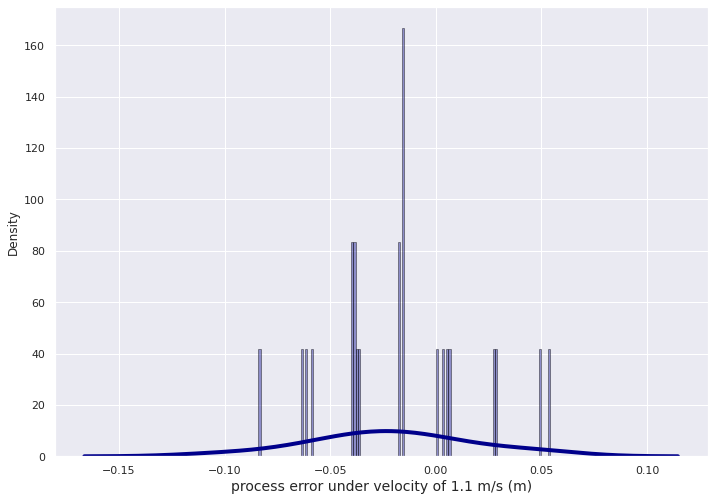

In [72]:
sns_plot = sns.distplot(process_error3, hist=True, kde=True, 
             bins=bin_values, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
# sns_plot.set(xlabel='process error (m)')
sns_plot.set_xlabel("process error under velocity of 1.1 m/s (m)",fontsize=14)
# plt.savefig("process_error_1.1.pdf")

In [73]:
frames = [process_error, process_error1, process_error2, process_error3]
p_e = pd.concat(frames)
forward = [forward_error, forward_error1, forward_error2, forward_error3]
f_e = pd.concat(forward)
lateral = [lateral_error, lateral_error1, lateral_error2, lateral_error3]
l_e = pd.concat(lateral)

In [39]:
p_e

0     0.028824
1     0.015438
2     0.006195
3    -0.027740
4    -0.029614
        ...   
20   -0.083810
21    0.000064
22   -0.039437
23    0.028285
24    0.006168
Name: act_dist, Length: 175, dtype: float64

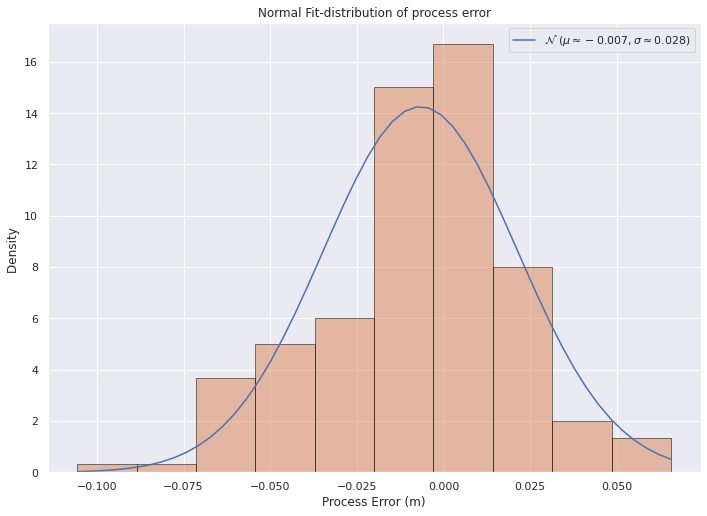

In [82]:
from scipy.stats import norm
# Standard Deviation and Mean
std = np.std(p_e, ddof=1)

mean = np.mean(p_e)

median = np.median(p_e)

# Plotting
domain = np.linspace(np.min(p_e), np.max(p_e))  # limits of the plot, the domain of the system
plt.plot(domain, norm.pdf(domain,mean,std),
          label='$\mathcal{N}$ '+ F'$( \mu \\approx {round(mean,3)}, \sigma \\approx {round(std,3)} )$')
plt.hist(p_e, edgecolor='black',alpha=0.5,density=True)  # Alpha is the oppacity of the system, "density" normalise the diagram
plt.title("Normal Fit-distribution of process error")
plt.xlabel("Process Error (m)")
plt.ylabel("Density ")
plt.legend()
plt.rcParams.update({'font.size': 14})
# plt.show()
# plt.savefig("normal_fit_dist_process_error.pdf", dpi=300)

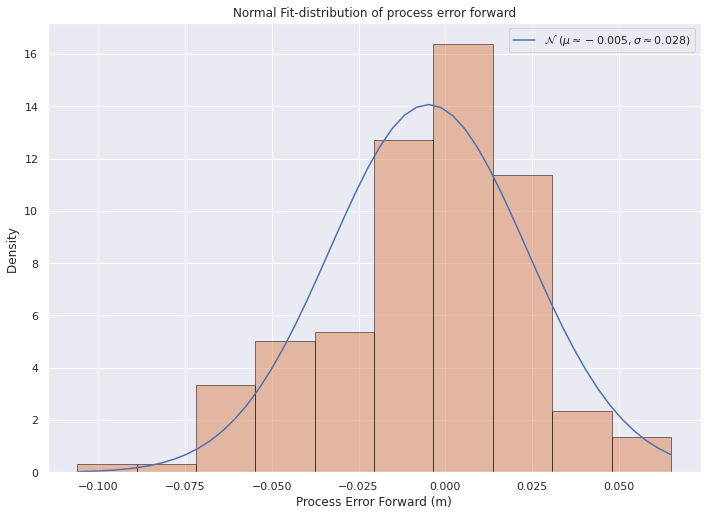

In [87]:
# Standard Deviation and Mean
std = np.std(f_e, ddof=1)

mean = np.mean(f_e)

median = np.median(f_e)

# Plotting
domain = np.linspace(np.min(f_e), np.max(f_e))  # limits of the plot, the domain of the system
plt.plot(domain, norm.pdf(domain,mean,std),
          label='$\mathcal{N}$ '+ F'$( \mu \\approx {round(mean,3)}, \sigma \\approx {round(std,3)} )$')
plt.hist(f_e, edgecolor='black',alpha=0.5,density=True)  # Alpha is the oppacity of the system, "density" normalise the diagram
plt.title("Normal Fit-distribution of process error forward")
plt.xlabel("Process Error Forward (m)")
plt.ylabel("Density ")
plt.legend()
plt.rcParams.update({'font.size': 14})
# plt.show()
# plt.savefig("normal_fit_dist_process_error_forward.pdf", dpi=300)

/home/mingze/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/mingze/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


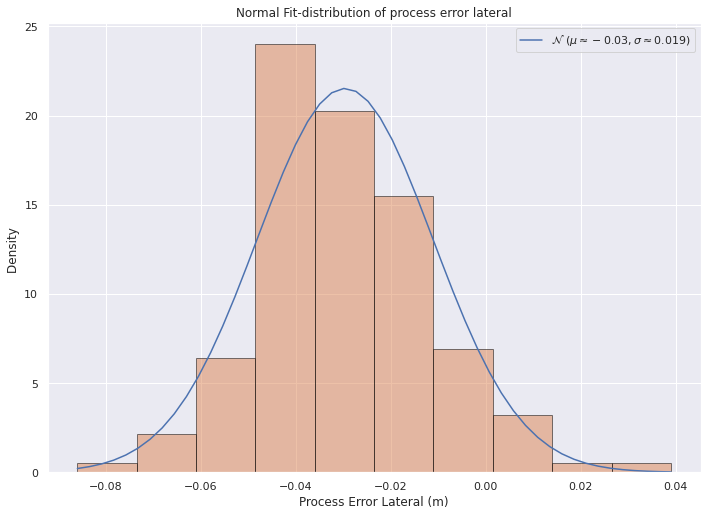

In [88]:
# Standard Deviation and Mean
std = np.std(l_e, ddof=1)

mean = np.mean(l_e)

median = np.median(l_e)

# Plotting
domain = np.linspace(np.min(l_e), np.max(l_e))  # limits of the plot, the domain of the system
plt.plot(domain, norm.pdf(domain, mean, std),
          label='$\mathcal{N}$ '+ F'$( \mu \\approx {round(mean,3)}, \sigma \\approx {round(std,3)} )$')
plt.hist(l_e, edgecolor='black',alpha=0.5,density=True)  # Alpha is the oppacity of the system, "density" normalise the diagram
plt.title("Normal Fit-distribution of process error lateral")
plt.xlabel("Process Error Lateral (m)")
plt.ylabel("Density ")
plt.legend()
plt.rcParams.update({'font.size': 14})
# plt.show()
# plt.savefig("normal_fit_dist_process_error_lateral.pdf", dpi=300)

/home/mingze/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Process Error (m)')

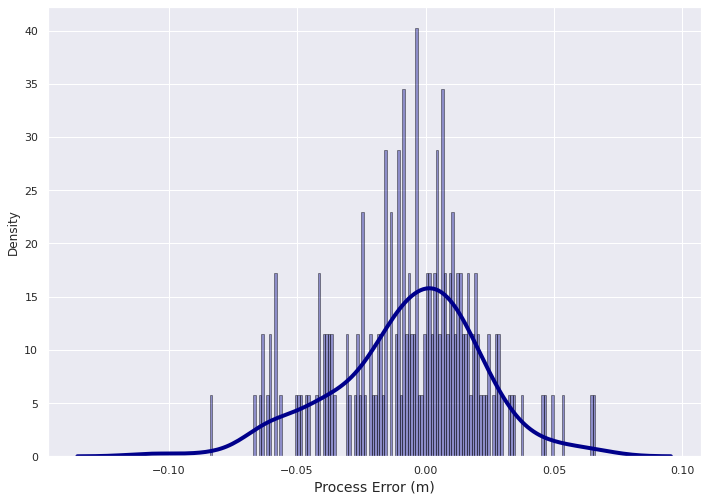

In [74]:
# sns.set(font_scale=1.5,rc={'figure.figsize':(11.7, 8.27)})
# kde:bool, optional
# Whether to plot a gaussian kernel density estimate.
# fit=norm
# fit: random variable object, optional
# An object with fit method, returning a tuple that can be passed to a pdf method a positional arguments following a grid of values to evaluate the pdf on.

sns_plot = sns.distplot(p_e, hist=True, kde=True, norm_hist=True,
             bins=bin_values, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
# sns_plot.set(xlabel='process error (m)')
sns_plot.set_xlabel("Process Error (m)", fontsize=14)
# plt.savefig("process_error.pdf", dpi=300)

/home/mingze/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


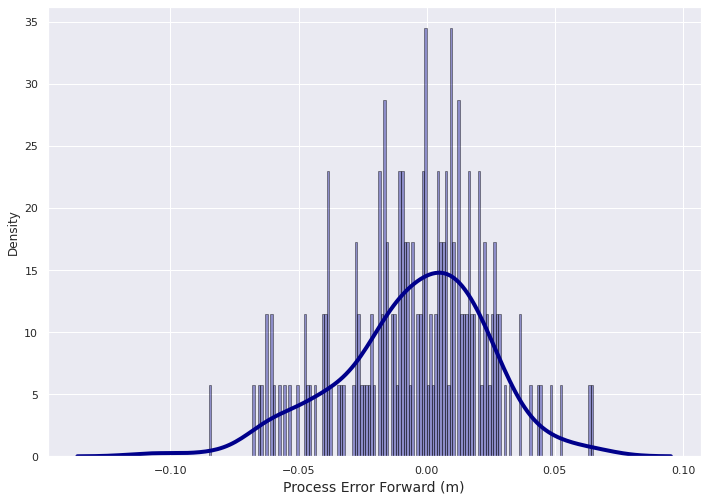

In [80]:
# sns.set(font_scale=1.5,rc={'figure.figsize':(11.7, 8.27)})
# kde:bool, optional
# Whether to plot a gaussian kernel density estimate.
# fit=norm
# fit: random variable object, optional
# An object with fit method, returning a tuple that can be passed to a pdf method a positional arguments following a grid of values to evaluate the pdf on.

sns_plot = sns.distplot(f_e, hist=True, kde=True, norm_hist=True,
             bins=bin_values, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
# sns_plot.set(xlabel='process error (m)')
sns_plot.set_xlabel("Process Error Forward (m)", fontsize=14)
# plt.savefig("process_error_forward.pdf", dpi=300)

/home/mingze/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


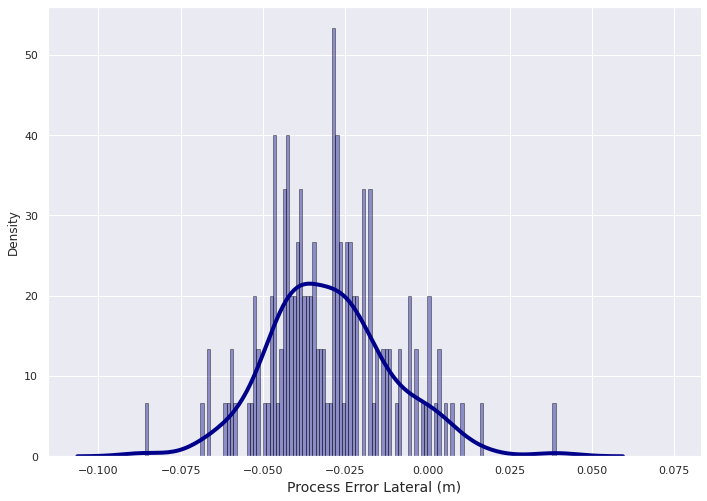

In [81]:
# sns.set(font_scale=1.5,rc={'figure.figsize':(11.7, 8.27)})
# kde:bool, optional
# Whether to plot a gaussian kernel density estimate.
# fit=norm
# fit: random variable object, optional
# An object with fit method, returning a tuple that can be passed to a pdf method a positional arguments following a grid of values to evaluate the pdf on.

sns_plot = sns.distplot(l_e, hist=True, kde=True, norm_hist=True,
             bins=bin_values, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
# sns_plot.set(xlabel='process error (m)')
sns_plot.set_xlabel("Process Error Lateral (m)", fontsize=14)
# plt.savefig("process_error_lateral.pdf", dpi=300)

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables.

In [25]:
x

0     4.076
1     4.064
2     4.055
3     4.021
4     4.019
      ...  
95    4.030
96    4.068
97    4.066
98    4.012
99    4.007
Name: x, Length: 100, dtype: float64

Text(0, 0.5, 'Frequencies')

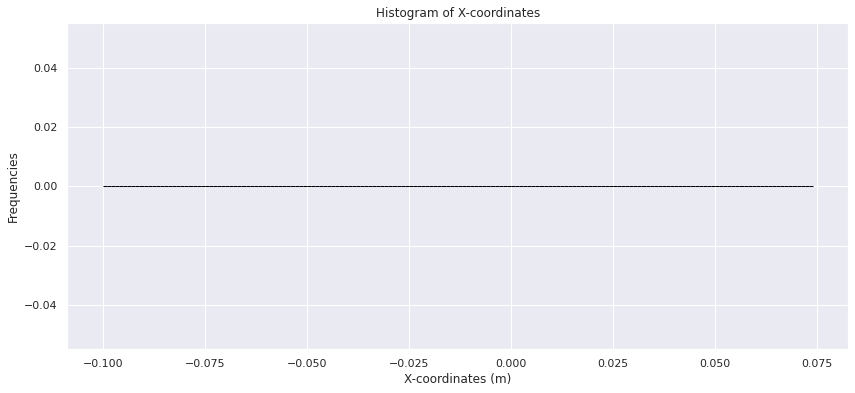

In [26]:
# figsize=[14,6]
plt.figure(figsize=(14, 6))
plt.hist(x, bins=bin_values, edgecolor='black')
plt.title('Histogram of X-coordinates')
plt.xlabel('X-coordinates (m)')
plt.ylabel('Frequencies')

<AxesSubplot:ylabel='Frequency'>

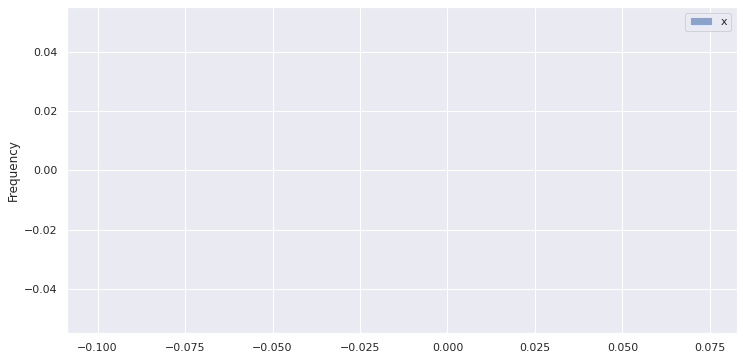

In [27]:
# alpha for transparency
x.plot(kind='hist', bins=bin_values, figsize=[12,6], alpha=.6, legend=True)

<AxesSubplot:>

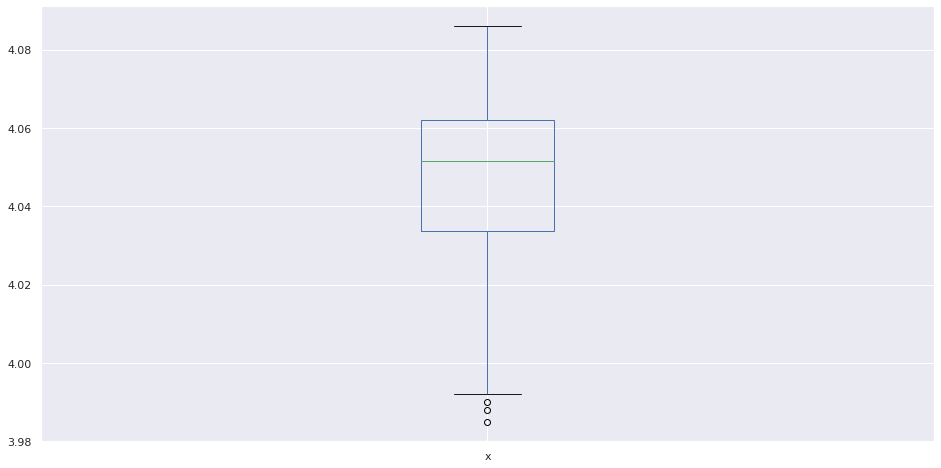

In [28]:
x.plot(kind='box', figsize=[16,8])